In [32]:
# Necessary packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import cv2
import os


def createImageFeatures(image, size=(32, 32)):
    # resize the image
    image = cv2.resize(image, size)
    # flatten the image
    pixel_list = image.flatten()
    return pixel_list

In [2]:
print("Reading all images")
image_paths = list(paths.list_images("D:\\UPWORK\\Afshan\\train"))
raw_images = []
labels = []

Reading all images


In [3]:
# loop over the input images
for (i, image_path) in enumerate(image_paths):
    image = cv2.imread(image_path)
    label = image_path.split(os.path.sep)[4]
    # extract raw pixel intensity "features
    pixels = createImageFeatures(image)
    raw_images.append(pixels)
    labels.append(label)

In [4]:
raw_images = np.array(raw_images)
labels = np.array(labels)
len(raw_images)

4543

In [12]:
(train_X, test_X, train_y, test_y) = train_test_split(
    raw_images , labels, test_size=0.25, random_state=0)
    
model = RandomForestClassifier()
model.fit(train_X, train_y)
acc = model.score(test_X, test_y)
print("Raw pixel accuracy: {:.2f}%".format(acc * 100))

# n_estimators=500 88.38%

Raw pixel accuracy: 87.68%


In [13]:
from sklearn.metrics import classification_report
print(classification_report(test_y, model.predict(test_X)))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        95
           1       0.94      0.91      0.92       139
           2       0.86      0.85      0.86       116
           3       0.78      0.78      0.78       129
           4       0.75      0.77      0.76       115
           5       0.93      0.93      0.93       139
           6       0.84      0.92      0.88       102
           7       0.98      0.95      0.96       100
           8       0.89      0.90      0.90       102
           9       0.90      1.00      0.95        99

    accuracy                           0.88      1136
   macro avg       0.88      0.88      0.88      1136
weighted avg       0.88      0.88      0.88      1136



In [28]:
np.unique(test_y, return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1'),
 array([ 95, 139, 116, 129, 115, 139, 102, 100, 102,  99], dtype=int64))

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, model.predict(test_X))

array([[ 73,   0,   1,   4,   1,   1,   3,   1,   4,   7],
       [  0, 126,   5,   0,   0,   0,   7,   0,   1,   0],
       [  0,   7,  99,   4,   4,   0,   2,   0,   0,   0],
       [  1,   0,   8, 101,  15,   0,   1,   0,   3,   0],
       [  1,   0,   1,  11,  88,   6,   4,   1,   3,   0],
       [  0,   0,   1,   1,   7, 129,   1,   0,   0,   0],
       [  2,   1,   0,   1,   2,   2,  94,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,  95,   0,   4],
       [  1,   0,   0,   7,   1,   1,   0,   0,  92,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  99]], dtype=int64)

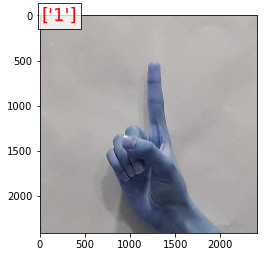

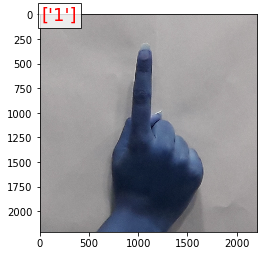

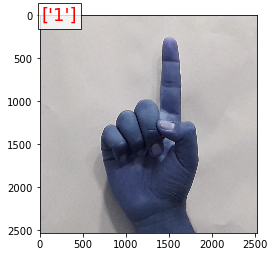

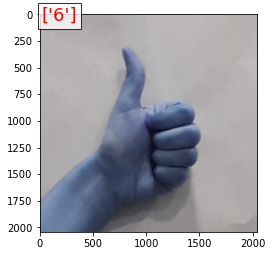

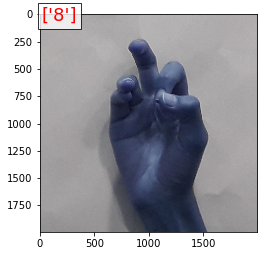

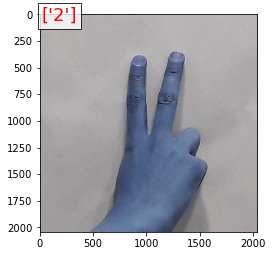

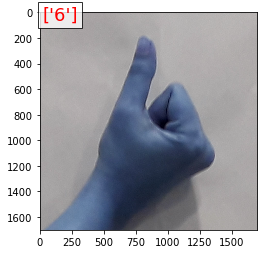

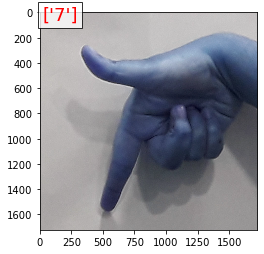

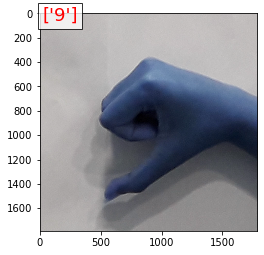

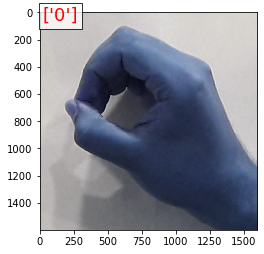

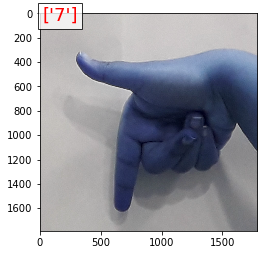

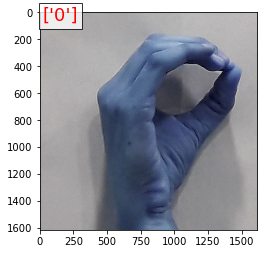

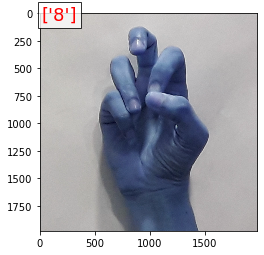

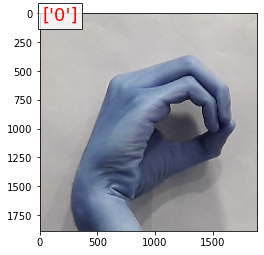

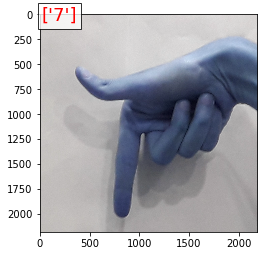

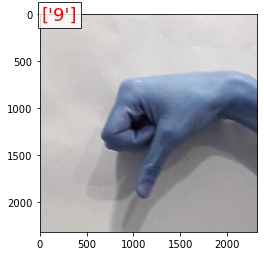

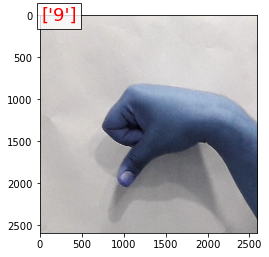

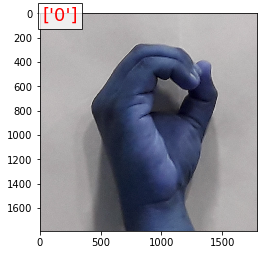

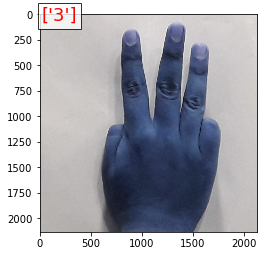

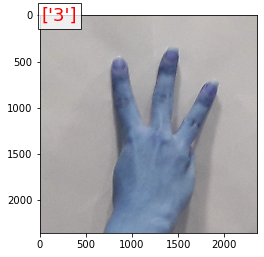

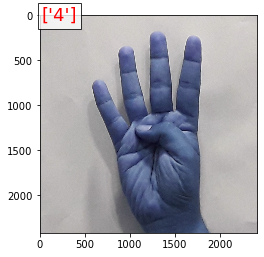

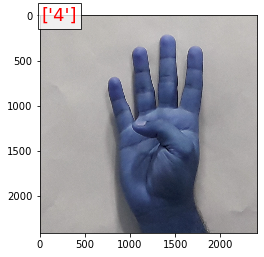

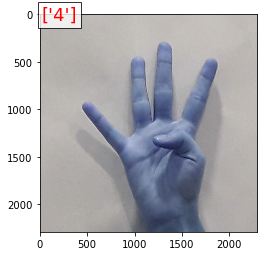

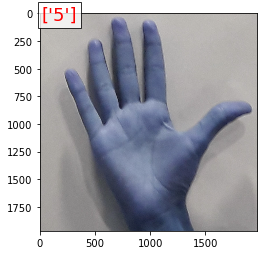

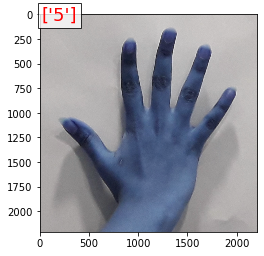

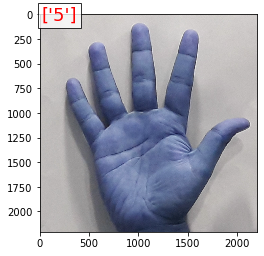

In [15]:
import matplotlib.pyplot as plt
for i in os.listdir("D:\\UPWORK\\Afshan\\Testing\\"):
    image = cv2.imread("D:\\UPWORK\\Afshan\\Testing\\"+i)
    dog = createImageFeatures(image)
    dog = np.array([dog])
    #print(model.predict(dog))
    value = model.predict(dog)
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(image) 
    plt.show()

In [16]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(train_X, train_y)
acc = model_svm.score(test_X, test_y)
print("Raw pixel accuracy: {:.2f}%".format(acc * 100))

Raw pixel accuracy: 89.96%


In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, model_svm.predict(test_X))

array([[ 73,   2,   0,   0,   4,   2,   2,   0,   3,   9],
       [  0, 134,   0,   0,   0,   0,   5,   0,   0,   0],
       [  0,   3, 106,   6,   0,   0,   1,   0,   0,   0],
       [  0,   0,  10,  99,  17,   2,   0,   0,   1,   0],
       [  0,   0,   0,  15,  93,   3,   0,   2,   2,   0],
       [  0,   0,   0,   1,   5, 133,   0,   0,   0,   0],
       [  5,   2,   0,   0,   3,   0,  92,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  97,   0,   3],
       [  2,   0,   0,   0,   0,   3,   0,   0,  97,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,  98]], dtype=int64)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(test_y, model_svm.predict(test_X)))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83        95
           1       0.95      0.96      0.96       139
           2       0.91      0.91      0.91       116
           3       0.82      0.77      0.79       129
           4       0.76      0.81      0.78       115
           5       0.93      0.96      0.94       139
           6       0.92      0.90      0.91       102
           7       0.98      0.97      0.97       100
           8       0.94      0.95      0.95       102
           9       0.89      0.99      0.94        99

    accuracy                           0.90      1136
   macro avg       0.90      0.90      0.90      1136
weighted avg       0.90      0.90      0.90      1136



In [19]:
from xgboost import XGBClassifier
model_knn = XGBClassifier()
model_knn.fit(train_X, train_y)
acc = model_knn.score(test_X, test_y)
print("Raw pixel accuracy: {:.2f}%".format(acc * 100))

Raw pixel accuracy: 83.71%


In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, model_knn.predict(test_X))

array([[ 64,   2,   4,   1,   1,   3,   6,   1,   5,   8],
       [  0, 127,   7,   1,   0,   0,   4,   0,   0,   0],
       [  0,   8,  95,   8,   3,   0,   2,   0,   0,   0],
       [  1,   0,  15,  92,  19,   1,   0,   0,   1,   0],
       [  1,   0,   0,  21,  85,   3,   2,   1,   2,   0],
       [  0,   0,   0,   1,  14, 124,   0,   0,   0,   0],
       [  4,   2,   0,   2,   3,   0,  89,   0,   0,   2],
       [  3,   0,   0,   0,   1,   0,   0,  93,   0,   3],
       [  3,   0,   0,   7,   1,   2,   0,   0,  89,   0],
       [  4,   1,   0,   0,   0,   0,   1,   0,   0,  93]], dtype=int64)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(test_y, model_knn.predict(test_X)))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        95
           1       0.91      0.91      0.91       139
           2       0.79      0.82      0.80       116
           3       0.69      0.71      0.70       129
           4       0.67      0.74      0.70       115
           5       0.93      0.89      0.91       139
           6       0.86      0.87      0.86       102
           7       0.98      0.93      0.95       100
           8       0.92      0.87      0.89       102
           9       0.88      0.94      0.91        99

    accuracy                           0.84      1136
   macro avg       0.84      0.84      0.84      1136
weighted avg       0.84      0.84      0.84      1136

